# <a href = "https://www.linkedin.com/feed/update/urn:li:activity:6906228386788626432/">Handling Imbalance Data in Machine learning </a>
Get familiar with various techniques to handle the imbalanced class.

We have implemented the following imbalance data handeling techniques:

1. Random Under-Sampling
2. Random Over-Sampling
3. Random under-sampling with imblearn
4. Random over-sampling with imblearn
5. Under-sampling: Tomek links
6. Synthetic Minority Oversampling Technique (SMOTE)
7. NearMiss
8. Change the performance metric
9. Penalize Algorithms (Cost-Sensitive Training)
10. Change the algorithm

In [16]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_boston 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, roc_auc_score
from sklearn.model_selection import train_test_split

from collections import Counter

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv("/Users/adityaagarwal/Aditya Ag/Jupyter Notebook/Deal with Imbalance Data/credit-card.csv")
data.head()

,Unnamed: 0,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
1,623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
2,4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
3,6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
4,6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1


In [5]:
data.shape

(9492, 32)

In [7]:
data.Class.value_counts()

0    9000
1     492
Name: Class, dtype: int64

### Taking the orginal data into account and predicting the Fraud and Non-Fraud Cases - 

In [9]:
data_0 = data[data['Class']==0]
data_1 = data[data['Class']==1]
data_0

,Unnamed: 0,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
492,236031,148645.0,2.087131,0.174699,-1.762514,0.378010,0.515231,-0.785758,0.199287,-0.241249,...,-0.372191,-0.951858,0.317775,0.386025,-0.228262,0.180525,-0.061110,-0.031560,1.29,0
493,271257,164489.0,0.039062,0.889239,0.302199,-0.585161,0.431838,-1.116524,1.050711,-0.232965,...,-0.253421,-0.535450,0.072419,0.050588,-0.475029,0.136236,0.248946,0.098623,5.99,0
494,218413,141305.0,-0.334332,-0.279289,0.558407,-2.721258,0.222245,0.105259,0.424721,-0.808027,...,-0.332232,0.203322,-0.152383,0.015132,-0.389804,-0.234411,-0.325232,-0.354962,20.00,0
495,128653,78791.0,1.145310,0.038190,1.103411,1.676224,-0.881220,-0.371989,-0.297177,0.009028,...,-0.092300,0.083340,-0.058040,0.749869,0.647730,-0.308037,0.058254,0.029025,5.00,0
496,153965,100832.0,1.890476,-0.561657,0.129218,0.394991,-0.803205,0.139739,-1.054481,0.121556,...,-0.061418,0.139415,0.258049,-0.424712,-0.630249,0.445302,-0.044791,-0.052782,39.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9487,207634,136765.0,-5.493186,4.057918,-1.795148,-0.522112,-3.901231,-0.338767,-4.216907,1.655481,...,2.827709,-0.480805,0.883135,0.476372,-0.422392,0.266097,-1.249686,-0.237272,0.74,0
9488,210369,137949.0,1.939843,-0.434933,-0.345178,0.307799,-0.487803,0.113880,-0.729222,0.152521,...,0.246981,0.914658,0.141960,0.799542,-0.099047,-0.270436,0.035708,-0.038128,9.99,0
9489,211880,138612.0,1.798427,-0.160432,-1.920048,1.051255,1.204895,0.892956,0.324847,0.194731,...,0.176878,0.684760,-0.019825,-1.506229,0.238479,-0.389693,0.019441,-0.080415,55.00,0
9490,273066,165405.0,2.114637,-0.211168,-1.638108,-0.010894,0.490466,-0.130107,-0.015770,-0.042934,...,-0.339011,-0.921378,0.170633,-1.413620,-0.180180,0.266670,-0.082983,-0.086125,1.98,0


In [15]:
# Checking the number of Fraudulent and Non-Fraudulent Cases

count = data['Class'].value_counts()

print('Fraudulent Cases - (1):', count[1])
print('Not Fraudulent Cases - (0):', count[0])

# print the percentage of question where target == 1
print("\n Percent of Fraudulent Cases is ", count[1]/count[0]* 100)

Fraudulent Cases - (1): 492
Not Fraudulent Cases - (0): 9000

 Percent of Fraudulent Cases is  5.466666666666667


[Text(0, 0, 'Non Fraud'), Text(1, 0, 'Fraud')]

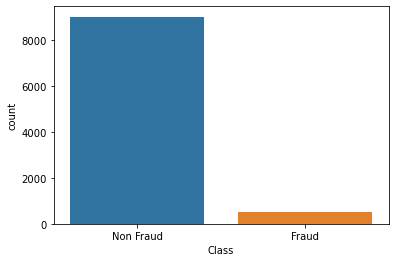

In [22]:
sns.countplot(data['Class']).set_xticklabels(['Non Fraud', 'Fraud'])

In [27]:
# Checking for Null values
data.isnull().sum()

Unnamed: 0    0
Time          0
V1            0
V2            0
V3            0
V4            0
V5            0
V6            0
V7            0
V8            0
V9            0
V10           0
V11           0
V12           0
V13           0
V14           0
V15           0
V16           0
V17           0
V18           0
V19           0
V20           0
V21           0
V22           0
V23           0
V24           0
V25           0
V26           0
V27           0
V28           0
Amount        0
Class         0
dtype: int64

#### Splitting the dataset into Predictor (X) and Response (Y) Variable

In [41]:
x = data.iloc[:,:-1]
y = data.iloc[:,-1]

#### Train-Test Split

In [42]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [76]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(7593, 31) (1899, 31) (7593,) (1899,)


#### Logistic Regression Model

In [44]:
model = LogisticRegression()
# Fitting the model
model.fit(x, y)
# Prediction
y_predict = model.predict(x)
y_predict

array([1, 1, 1, ..., 0, 0, 0])

In [50]:
print("Accuracy score is ",round(accuracy_score(y_predict, y)*100,2),"%")

Accuracy score is  98.81 %


In [61]:
print(y_train.shape[0])
print(y_test.shape[0])

if (y_train.shape[0] + y_test.shape[0] == y.shape[0]):
    print(y.shape[0])
else:
    print("Train_test Split did not occur properly")

7593
1899
9492


In [52]:
confusion_matrix(y_predict, y)

array([[8965,   78],
       [  35,  414]])

## Generating a Function for Logistic Regression - 

In [91]:
def log_reg(data):
    x = data.iloc[:,:-1]
    y = data.iloc[:,-1]
    print("Shape of X",x.shape)
    print("Shape of Y",y.shape)
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    
    model = LogisticRegression()
    # Fitting the model
    model.fit(x, y)
    # Prediction
    y_predict = model.predict(x)
    accuracy = round(accuracy_score(y_predict, y)*100,2)
    return print("Accuracy of the model is ", accuracy)

## Implementing Resampling Techniques

A widely adopted technique for dealing with highly unbalanced datasets is called resampling. It consists of removing samples from the majority class (under-sampling) and/or adding more examples from the minority class (over-sampling). <br>

The simplest implementation of over-sampling is to duplicate random records from the minority class, which can cause overfishing. <br>

In under-sampling, the simplest technique involves removing random records from the majority class, which can cause loss of information.

In [64]:
# class count
class_count_0, class_count_1 = data['Class'].value_counts()
print(class_count_0)
print(class_count_1)

9000
492


In [66]:
# divide class group into 1 and 0
class_0 = data[data['Class'] == 0]
class_1 = data[data['Class'] == 1]

# print the shape of the class
print('class 0:', class_0.shape)
print('\nclass 1:', class_1.shape)

class 0: (9000, 32)

class 1: (492, 32)


### 1. Random under sampling

We have 1s = 492 (minority) and 0s = 9000 (majority)
In Random undersampling method, we randomly take 492 (Minority class) samples from our Majority class <br>

Undersampling can be defined as removing some observations of the majority class. This is done until the majority and minority class is balanced out. <br>

Undersampling can be a good choice when you have a ton of data -think millions of rows. But a drawback to undersampling is that we are removing information that may be valuable

total class of 1 and 0:
 0    492
1    492
Name: Class, dtype: int64


<AxesSubplot:title={'center':'Count the target values'}>

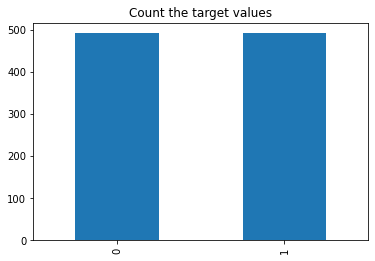

In [70]:
# Randomly taking 492 samples from class_0
class_0_under_sample = class_0.sample(class_count_1)
# concat 
test_under = pd.concat([class_0_under_sample, class_1], axis=0)

print("total class of 1 and 0:\n",test_under['Class'].value_counts())

test_under['Class'].value_counts().plot(kind='bar', title='Count the target values')

In [92]:
# Predicting the Accuracy for Undersampled Dataset
log_reg(test_under)

Shape of X (984, 31)
Shape of Y (984,)
Accuracy of the model is  94.0


### 2. Random over sampling 

Oversampling can be defined as adding more copies to the minority class. Oversampling can be a good choice when you don’t have a ton of data to work with.

A con to consider when undersampling is that it can cause overfitting and poor generalization to your test set

class count of 1 and 0:
 0    9000
1    9000
Name: Class, dtype: int64


<AxesSubplot:title={'center':'Count (target)'}>

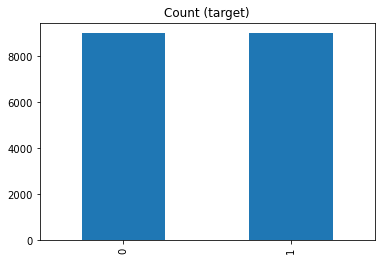

In [93]:
class_1_over = class_1.sample(class_count_0, replace=True)

test_over = pd.concat([class_1_over, class_0], axis=0)

# print the number of class count
print('class count of 1 and 0:\n', test_over['Class'].value_counts())

# plot the count
test_over['Class'].value_counts().plot(kind='bar', title='Count (target)')

In [94]:
# Predicting the Accuracy for Undersampled Dataset
log_reg(test_over)

Shape of X (18000, 31)
Shape of Y (18000,)
Accuracy of the model is  91.46


### 3. Random under-sampling with imblearn
RandomUnderSampler is a fast and easy way to balance the data by randomly selecting a subset of data for the targeted classes. <br>

Under-sample the majority class(es) by randomly picking samples with or without replacement.

In [95]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42, replacement=True) 

# fit predictor and target variable
x_rus, y_rus = rus.fit_resample(x, y)
print('original dataset shape:', Counter(y))
print('Resample dataset shape', Counter(y_rus))

original dataset shape: Counter({0: 9000, 1: 492})
Resample dataset shape Counter({0: 492, 1: 492})


In [102]:
# Concat the X data and y data for prediction
test_under_imb = pd.concat([x_rus, y_rus], axis=1)
test_under_imb

,Unnamed: 0,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,195843,131245.0,2.113416,-1.778946,-0.270242,-1.435794,-1.934593,-0.404340,-1.605464,0.028426,...,0.130515,0.816912,0.124606,0.080239,-0.286359,-0.017499,0.030221,-0.043715,63.50,0
1,175540,122383.0,1.807996,0.175712,0.078832,4.087285,-0.395966,0.137835,-0.377114,0.219787,...,0.152284,0.614129,0.158536,0.510383,-0.057457,0.085855,-0.016525,-0.055248,0.00,0
2,49890,44253.0,1.235299,0.406386,0.455123,0.763918,-0.479694,-1.246685,0.130762,-0.256403,...,-0.260211,-0.723520,0.163591,0.686827,0.191903,0.072414,-0.018825,0.035194,0.99,0
3,226154,144514.0,-1.093171,1.836577,-0.964793,0.804425,0.495996,-0.419712,0.591444,0.741234,...,0.194233,0.654505,-0.258591,-0.450439,0.144125,-0.359537,0.299614,0.148007,13.99,0
4,118780,75211.0,1.276001,-0.656403,-0.732196,-0.564148,0.041672,0.204972,-0.112896,-0.088853,...,-0.424230,-0.991840,-0.288935,-1.386478,0.594111,0.553389,-0.060694,-0.000594,109.32,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
980,280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
981,280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
982,281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [103]:
# Predicting the accuracy of the model for Random Undersampling using Imblearn library
log_reg(test_under_imb)

Shape of X (984, 31)
Shape of Y (984,)
Accuracy of the model is  92.99


#### 4. Random Over-Sampling by Imblearn

In [104]:
# import library
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
# fit predictor and target variable
x_ros, y_ros = ros.fit_resample(x, y)
print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_ros))

Original dataset shape Counter({0: 9000, 1: 492})
Resample dataset shape Counter({1: 9000, 0: 9000})


In [105]:
test_over_imb = pd.concat([x_ros, y_ros], axis = 1)
test_over_imb

,Unnamed: 0,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
1,623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
2,4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
3,6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
4,6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17995,150679,93879.0,-12.833631,7.508790,-20.491952,7.465780,-11.575304,-5.140999,-14.020564,8.332120,...,2.966842,0.615344,-0.766495,0.431261,-0.104975,-0.010091,-2.400811,-0.720557,104.03,1
17996,8296,11080.0,-2.125490,5.973556,-11.034727,9.007147,-1.689451,-2.854415,-7.810441,2.030870,...,1.646518,-0.278485,-0.664841,-1.164555,1.701796,0.690806,2.119749,1.108933,1.00,1
17997,108258,70828.0,0.196707,1.189757,0.704882,2.891388,0.045555,1.245730,-1.198714,-2.421616,...,-1.328132,0.189311,-0.005524,-0.814708,0.400924,0.286281,0.135215,0.257315,0.76,1
17998,6609,8090.0,-1.783229,3.402794,-3.822742,2.625368,-1.976415,-2.731689,-3.430559,1.413204,...,0.454032,-0.577526,0.045967,0.461700,0.044146,0.305704,0.530981,0.243746,1.00,1


In [106]:
log_reg(test_over_imb)

Shape of X (18000, 31)
Shape of Y (18000,)
Accuracy of the model is  91.51


### 5. Under-sampling Tomek links

It selects the classes that are close to each other and eliminates them. This helps to make sure that there some space between the classes and introduces variability between them.



In [109]:
# load library
from imblearn.under_sampling import TomekLinks

tom_link = TomekLinks(sampling_strategy='majority')

# fit predictor and target variable
x_tl, y_tl = tom_link.fit_resample(x, y)

print('Original dataset shape:', Counter(y))
print('Resample dataset shape:', Counter(y_tl))

Original dataset shape: Counter({0: 9000, 1: 492})
Resample dataset shape: Counter({0: 8829, 1: 492})


In [115]:
# Merging the predictor and response variable
test_under_tomek = pd.concat([x_tl,y_tl], axis=1)

In [116]:
log_reg(test_under_tomek)

Shape of X (9321, 31)
Shape of Y (9321,)
Accuracy of the model is  98.65


In [118]:
y

0       1
1       1
2       1
3       1
4       1
       ..
9487    0
9488    0
9489    0
9490    0
9491    0
Name: Class, Length: 9492, dtype: int64

#### 6. Synthetic Minority Oversampling Technique (SMOTE)


In [122]:
from imblearn.over_sampling import SMOTE as sm

smot = sm(random_state=42)
X_train_smote, y_train_smote = smot.fit_resample(x,y)


print("Training X labeled data", X_train_smote)
print("Testing_y_Smote", y_train_smote)

Training X labeled data        Unnamed: 0           Time         V1         V2         V3        V4  \
0             541     406.000000  -2.312227   1.951992  -1.609851  3.997906   
1             623     472.000000  -3.043541  -3.157307   1.088463  2.288644   
2            4920    4462.000000  -2.303350   1.759247  -0.359745  2.330243   
3            6108    6986.000000  -4.397974   1.358367  -2.592844  2.679787   
4            6329    7519.000000   1.234235   3.019740  -4.304597  4.732795   
...           ...            ...        ...        ...        ...       ...   
17995       64315   51093.783406 -10.328863   7.565426 -13.288927  4.292912   
17996      151023   94405.539661 -21.794928  13.770434 -25.262273  8.057102   
17997        6403    7589.211567   0.548148   2.755503  -5.555362  4.667975   
17998      273420  165544.616207  -4.488726   0.892980  -3.527128  2.248782   
17999      203487  134837.244514  -0.035220   2.587341  -5.560888  6.173897   

              V5        V6 

In [124]:
# merging the dataset
test_Over_smote = pd.concat([X_train_smote, y_train_smote], axis = 1)

In [125]:
# Predicting the value of the Fraud cases using log regression

log_reg(test_Over_smote)

Shape of X (18000, 31)
Shape of Y (18000,)
Accuracy of the model is  95.7


Here, we got an accuracy of 95.7%

### 7. Near Miss Algorithm
In undersampling techniques, there are times when we have to deal with information loss.

In this algorithm, if two class variables are very close to each other, the nwe remove the Majorty class variable in order to improve the spacing between the Class variables.

In [128]:
from imblearn.under_sampling import NearMiss

near_miss = NearMiss()

x_train_nm, y_test_nm = near_miss.fit_resample(x,y)
print("Training Data:",x_train_nm)
print("Testing Data:", y_test_nm)

Training Data:      Unnamed: 0      Time        V1        V2        V3        V4        V5  \
0        251875  155540.0  2.021473  0.201487 -1.578119  0.333436  0.488698   
1         10490   17208.0  1.258132  0.363787  0.655607  0.825867 -0.397760   
2         10495   17216.0  1.236245 -0.308689 -0.479570 -0.095878  1.651517   
3        123286   76870.0 -1.050697  1.500753  0.846326 -0.282956  0.059866   
4        251856  155530.0  0.163969  1.045849 -1.211776 -0.202435  0.509677   
..          ...       ...       ...       ...       ...       ...       ...   
979      279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487   
980      280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581   
981      280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541   
982      281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618   
983      281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147   

           V6        V7        V8  .

In [130]:
# Merging both the data
test_under_never_miss = pd.concat([x_train_nm, y_test_nm], axis=1)

In [131]:
# Predicting the value of the Fraud cases using log regression

log_reg(test_under_never_miss)

Shape of X (984, 31)
Shape of Y (984,)
Accuracy of the model is  92.78


### 8. Change the Performance Metrics

Accuracy is not the best metric to use when evaluating imbalanced datasets as it can be misleading.
Metrics that can provide better insight are:<br>

1. Confusion Matrix: a table showing correct predictions and types of incorrect predictions.
2. Precision: the number of true positives divided by all positive predictions. Precision is also called Positive Predictive Value. It is a measure of a classifier’s exactness. Low precision indicates a high number of false positives.
3. Recall: the number of true positives divided by the number of positive values in the test data. The recall is also called Sensitivity or the True Positive Rate. It is a measure of a classifier’s completeness. Low recall indicates a high number of false negatives.
4. F1: Score: the weighted average of precision and recall.
5. Area Under ROC Curve (AUROC): AUROC represents the likelihood of your model distinguishing observations from two classes.
In other words, if you randomly select one observation from each class, what’s the probability that your model will be able to “rank” them correctly?